# Depth maps develpment for integration in interface.py

In [9]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import gaussian_filter1d, median_filter, gaussian_filter

plt.rcParams["figure.figsize"] = (12, 7)

In [2]:
w = 1936
h = 1176
header_size = 512

Defin a histogram equalization funtion

In [3]:
def equalize_histogram(img, max, w):
    [M, N]=img.shape
    # Calcul de la transformation
    counts, bins = np.histogram(img, bins=max+1, range=(0,max-1))
    T = 1/(np.count_nonzero(w))*np.cumsum(counts)

    img_eq = max*np.ones((img.shape))
    img_eq[w]=(max-50)*T[img[w]]
    counts_post, bins_post = np.histogram(img_eq, bins=max+1)
    
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.stairs(counts, bins)
    ax1.set_title('Pré-égalisation')
    ax2.stairs(counts_post, bins_post)
    ax2.set_title('Post-égalisation')
    plt.show()
    
    return img_eq

Apply the equalize_histogram() function and compare histograms before and after equalization

2100 1960.0


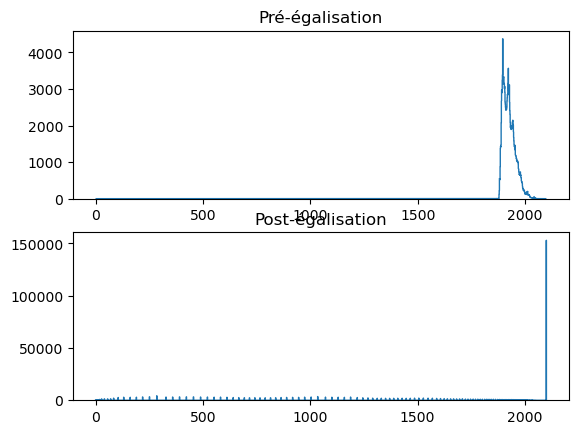

2100.0 1780.8422954653063


In [5]:
file_path = r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01\auto_01_007367_XYZ_0.raw'

with open(file_path, 'r') as f:
        f.seek(header_size)
        xyz = np.fromfile(f, np.float32).reshape((h,w,3))

xyz = xyz.astype(np.uint16)
z = xyz[:,:,2].T
z = z[-1:0:-1, :][560:1280, 350:850]
z = median_filter(z, 5)

z[z == 0] = np.max(z) + 50

weights = np.ones((z.shape))
weights[z > np.max(z)-70] = 0
weights = weights.astype(bool)

print(np.max(z), np.median(z))

z_eq = equalize_histogram(z, np.max(z), weights)

print(np.max(z_eq), np.median(z_eq))

Show images with different colormaps, before and after equalization

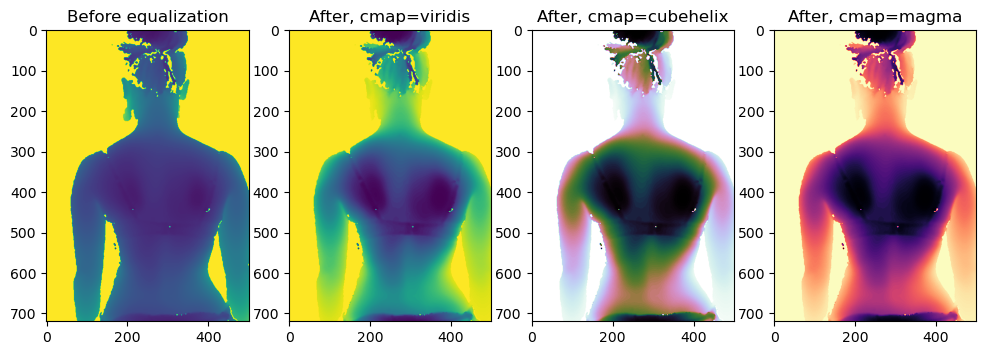

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.imshow(z)
ax1.set_title('Before equalization')
ax2.imshow(z_eq, cmap='viridis', vmin=0, vmax=2104)
ax2.set_title('After, cmap=viridis')
ax3.imshow(z_eq, cmap='cubehelix', vmin=0, vmax=2104)
ax3.set_title('After, cmap=cubehelix')
ax4.imshow(z_eq, cmap='magma', vmin=0, vmax=2104)
ax4.set_title('After, cmap=magma')

plt.show()

Customize cmap to show the deepest as a white background

In [13]:
def white_in_cmp(cmap, pos, len):
    cmap_initial = cm[cmap]
    newcolors = cmap_initial(np.linspace(0,1,len))
    newcolors[pos, :] = np.array([1,1,1,1])
    newcmp = ListedColormap(newcolors)
    return newcmp

Show depth map with customized cmap (white background) and colorbar

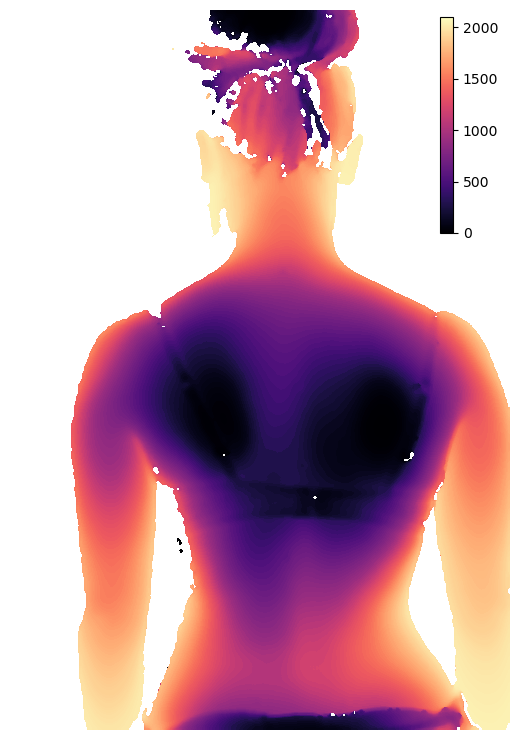

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6, 7.2))

newcmp = white_in_cmp('magma', -1, int(np.max(z_eq)))

plt.imshow(z_eq, cmap=newcmp)
plt.subplots_adjust(left = 0, right = 1, top = 1, bottom = 0)
plt.axis('off')

cbaxes = inset_axes(ax, width="3%", height="30%", loc='upper right', bbox_to_anchor=(0, 0, .9, 1), bbox_transform=ax.transAxes)
plt.colorbar(cax=cbaxes, ticks=[0, 500, 1000, 1500, 2000])
plt.show()
